<a href="https://colab.research.google.com/github/CamiloMateluna/Colab/blob/main/Solucion_taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 1 Camilo Mateluna


Primeras filas del DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

<ipython-input-2-35490c82c9f7>:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-2-35490c82c9f7>:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

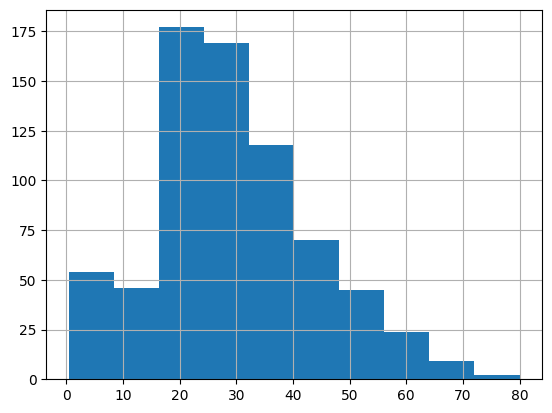

In [2]:
###Solución taller 1 Camilo Mateluna

###Sección 1

#Ejercicio 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#cargar el dataframe

df = pd.read_csv("Titanic-Dataset.csv")

print("\nPrimeras filas del DataFrame:")
print(df.head())

print("\nDescripción estadística:")
print(df.describe())


#Ejercicio 2

#Listar los nombres de las columnas
col = df.columns
print(col)

#Verificar los tipos
tipos = df.dtypes
print(tipos)


###Sección 2

#Ejercicio 3

 #Media
media=df.mean(numeric_only=True)
print(media)

#Mediana
mediana=df.median(numeric_only=True)
print(mediana)

#desviación estándar
ds=df.std(numeric_only=True)
print(ds)

#Conteo de valores únicos en columnas categóricas:

#Para la columna "Name"
conteo_name = df["Name"].value_counts
print(conteo_name)

#Para contar todas las columnas
conteo_col = df.nunique()
print(conteo_col)

#Ejercicio 4

#Ver cuantos faltantes hay por columna
print("\nnumero de faltantes por columna")
num_faltantes = df.isnull().sum()
print(num_faltantes)

#Inspecciona si alguna columna (ej. Cabin, Age) tiene muchos valores nulos.

col_con_nulos = num_faltantes[num_faltantes > 0]
print("\nColumnas con entradas nulas:")
print(col_con_nulos)

#Para imputar datos usaremos
#Para age mediana
df['Age'].hist() #para ver como se comporta
df["Age"].fillna(df["Age"].median(), inplace=True)

#Para Embarked Moda
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

#Para Cabin Eliminar
df["Cabin"].fillna("Desconocido", inplace=True)

print(df)


Estrategias para eliminar valores nulos
1. Se utiliza para eliminar filar o columnas con algún nulo
df.dropna() elimina filas con al menos un valor nulo.
df.dropna(axis=1) elimina columnas enteras con al menos un valor nulo.


2. Se utiliza para reemplazar valores nulos por algún valor razonable
* Para columnas numéricas, usar media o mediana
df["Age"].fillna(df["Age"].median(), inplace=True)

Si la distribución no es simétrica, se prefiere usar la mediana (esto se ve usando un histograma df('Age').hist()

* Para columnas categóricas, usar moda (por ej para Embarked o Sex)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

* Para un valor fijo, se puede indicar que falta el dato
df["Cabin"].fillna("Desconocido", inplace=True)


In [11]:
#Seccion 3 Filtrado, Selección y Agrupación

#Ejercicio 5

#Seleccionar las columnas pedidas
df_filtrado = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]

#filtrar filas con Age > 50
df_filtrado_age = df_filtrado[(df_filtrado["Age"] > 50)]
print(df_filtrado_age)

#filtrar filas con Pclass 1 o 2
df_filtrado_age_class = df_filtrado_age[(df_filtrado_age["Pclass"] == 1) | (df_filtrado_age["Pclass"] == 2) ]
#acá, una alternativa es usar (df_filtrado_age["Pclass"].isin([1, 2])) en lugar de |
print(df_filtrado_age_class)

     Survived  Pclass     Sex   Age     Fare
6           0       1    male  54.0  51.8625
11          1       1  female  58.0  26.5500
15          1       2  female  55.0  16.0000
33          0       2    male  66.0  10.5000
54          0       1    male  65.0  61.9792
..        ...     ...     ...   ...      ...
820         1       1  female  52.0  93.5000
829         1       1  female  62.0  80.0000
851         0       3    male  74.0   7.7750
857         1       1    male  51.0  26.5500
879         1       1  female  56.0  83.1583

[64 rows x 5 columns]
     Survived  Pclass     Sex   Age      Fare
6           0       1    male  54.0   51.8625
11          1       1  female  58.0   26.5500
15          1       2  female  55.0   16.0000
33          0       2    male  66.0   10.5000
54          0       1    male  65.0   61.9792
96          0       1    male  71.0   34.6542
124         0       1    male  54.0   77.2875
150         0       2    male  51.0   12.5250
155         0       1  

Note que en el paso anterior, el filtrado se hizo sobre el filtro anterior, por lo que #df_filtrado_age_class entrega las columnas pedidas, age > 50 y de clase 1 o 2

In [24]:
#Ejercicio 6

#Agrupar por Pclass
df_agrupado_pclass = df.groupby("Pclass")

#mostrar edad promedio
edad_promedio_por_clase = df_agrupado_pclass["Age"].mean()
print(edad_promedio_por_clase)

#Agrupa por Sex y muestra la tasa de supervivencia
df_agrupado_sex = df.groupby("Sex")
tasa_supervivencia_por_sexo = df_agrupado_sex["Survived"].mean()
print(tasa_supervivencia_por_sexo)

#Multiples agregaciones (calcular varias estadísticas a la vez)
df.groupby("Pclass").agg({
    "Age": ["mean", "max", "min"],
    "Fare": ["median", "std"]
})


Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Age                 Fare           
             mean   max   min   median        std
Pclass                                           
1       36.812130  80.0  0.92  60.2875  78.380373
2       29.765380  70.0  0.67  14.2500  13.417399
3       25.932627  74.0  0.42   8.0500  11.778142

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


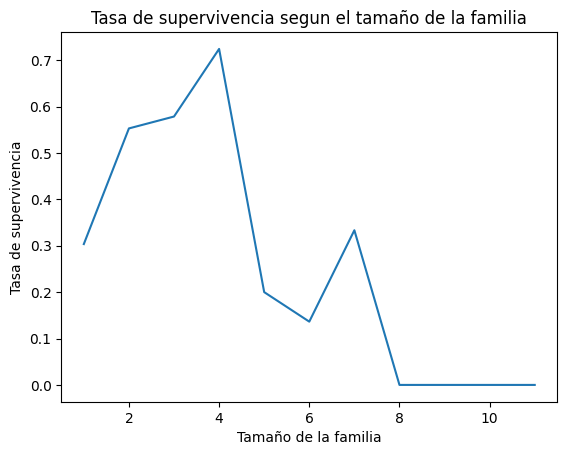

In [36]:
#Sección 4

#Ejercicio 7

#en este caso, df["SibSp"] representa la cantidad de hermanos/esposos que viajaban con el pasajero y df["Parch"] la cantidad de padres/hijos. el 1 suma al propio pasajero
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
print(df["FamilySize"])

#relacion entre tamaño de la familia y supervivencia
df_relacion = df.groupby("FamilySize")["Survived"].mean()
print(df_relacion)

plt.plot(df_relacion)
plt.title('Tasa de supervivencia segun el tamaño de la familia')
plt.xlabel('Tamaño de la familia')
plt.ylabel('Tasa de supervivencia')
plt.show()

#parte opcional
